In [5]:
import numpy as np
import matplotlib.pyplot as plt

from floris import FlorisModel

fmodel = FlorisModel(r"C:\Users\DELL\Desktop\Cosas universidad sexto semestre\pf_electrica\prueba\gch.yaml")

x, y = fmodel.get_turbine_layout()

print("     x       y")
for _x, _y in zip(x, y):
    print(f"{_x:6.1f}, {_y:6.1f}")

     x       y
   0.0,    0.0
 630.0,    0.0
1260.0,    0.0


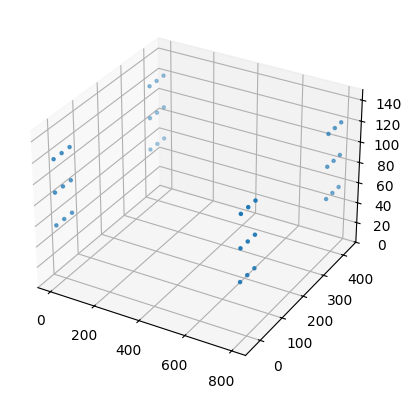

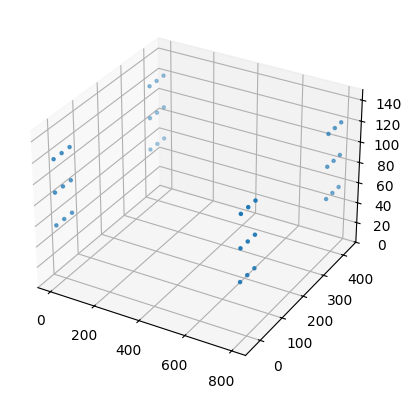

Dimensions of `powers`
(4, 4)

Turbine powers for 8 m/s
Wind condition 0
  Turbine 0 - 1,753.95 kW
  Turbine 1 - 1,753.95 kW
  Turbine 2 -  904.68 kW
  Turbine 3 -  904.85 kW

Wind condition 1
  Turbine 0 - 1,753.95 kW
  Turbine 1 - 1,753.95 kW
  Turbine 2 - 1,644.86 kW
  Turbine 3 - 1,643.39 kW

Turbine powers for all turbines at all wind conditions
[[1753.95445918 1753.95445918  904.68478734  904.84672946]
 [1753.95445918 1753.95445918 1644.85720431 1643.39012544]
 [2496.42786184 2496.42786184 1276.4580679  1276.67310219]
 [2496.42786184 2496.42786184 2354.40522998 2352.47398836]]


In [15]:
x_2x2 = [0, 0, 800, 800]
y_2x2 = [0, 400, 0, 400]
fmodel.set(layout_x=x_2x2, layout_y=y_2x2)

x, y = fmodel.get_turbine_layout()

fmodel.set(wind_directions=[270.0], wind_speeds=[8.0], turbulence_intensities=[0.1])

fmodel.set(
    wind_directions=[270.0, 280.0],
    wind_speeds=[8.0, 8.0],
    turbulence_intensities=[0.1, 0.1],
)

fmodel.set(
    wind_directions=[270.0, 280.0, 270.0, 280.0],
    wind_speeds=[8.0, 8.0, 9.0, 9.0],
    turbulence_intensities=[0.1, 0.1, 0.1, 0.1],
)
x = fmodel.core.grid.x_sorted[0, :, :, :]
y = fmodel.core.grid.y_sorted[0, :, :, :]
z = fmodel.core.grid.z_sorted[0, :, :, :]

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z, marker=".")
ax.set_zlim([0, 150])
plt.show()

x = fmodel.core.grid.x_sorted[0, :, :, :]
y = fmodel.core.grid.y_sorted[0, :, :, :]
z = fmodel.core.grid.z_sorted[0, :, :, :]

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z, marker=".")
ax.set_zlim([0, 150])
plt.show()
fmodel.run()
powers = fmodel.get_turbine_powers() / 1000.0  # calculated in Watts, so convert to kW

print("Dimensions of `powers`")
print( np.shape(powers) )

N_TURBINES = fmodel.core.farm.n_turbines

print()
print("Turbine powers for 8 m/s")
for i in range(2):
    print(f"Wind condition {i}")
    for j in range(N_TURBINES):
        print(f"  Turbine {j} - {powers[i, j]:7,.2f} kW")
    print()

print("Turbine powers for all turbines at all wind conditions")
print(powers)

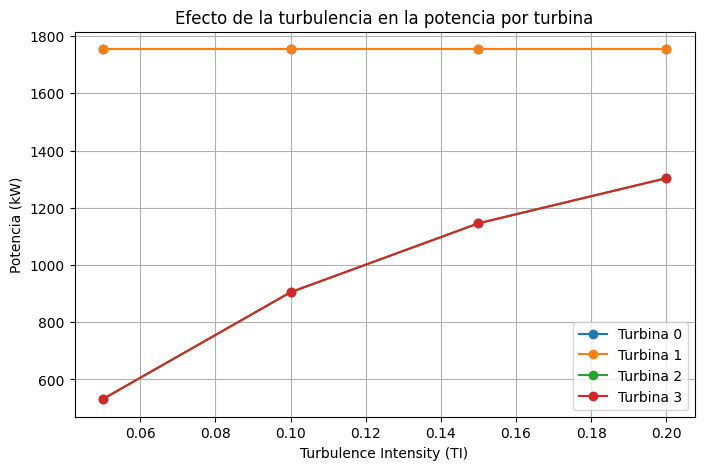

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Definir layout 2x2
x_2x2 = [0, 0, 800, 800]
y_2x2 = [0, 400, 0, 400]
fmodel.set(layout_x=x_2x2, layout_y=y_2x2)

# Condiciones fijas de viento
wind_direction = [270.0]   # viento del oeste
wind_speed = [8.0]         # 8 m/s

# Valores de turbulencia a probar
TI_values = [0.05, 0.1, 0.15, 0.2]

results = []

for TI in TI_values:
    # Configurar con distinta turbulencia
    fmodel.set(
        wind_directions=wind_direction,
        wind_speeds=wind_speed,
        turbulence_intensities=[TI]
    )
    fmodel.run()

    # Potencia de todas las turbinas (en kW)
    powers = fmodel.get_turbine_powers() / 1000.0
    results.append(powers.flatten())  # guardar vector de turbinas

results = np.array(results)  # shape: (n_TI, n_turbinas)

# Graficar resultados
plt.figure(figsize=(8,5))
for j in range(results.shape[1]):  # una curva por turbina
    plt.plot(TI_values, results[:, j], marker="o", label=f"Turbina {j}")

plt.xlabel("Turbulence Intensity (TI)")
plt.ylabel("Potencia (kW)")
plt.title("Efecto de la turbulencia en la potencia por turbina")
plt.legend()
plt.grid(True)
plt.show()


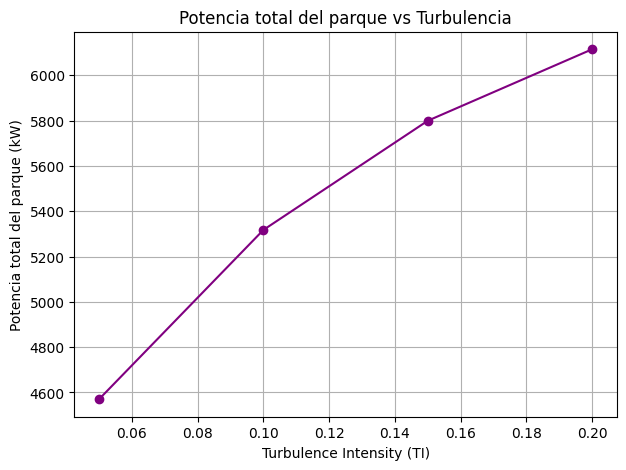

In [17]:
# Potencia total del parque para cada nivel de turbulencia
total_power = results.sum(axis=1)

plt.figure(figsize=(7,5))
plt.plot(TI_values, total_power, marker="o", color="purple")
plt.xlabel("Turbulence Intensity (TI)")
plt.ylabel("Potencia total del parque (kW)")
plt.title("Potencia total del parque vs Turbulencia")
plt.grid(True)
plt.show()


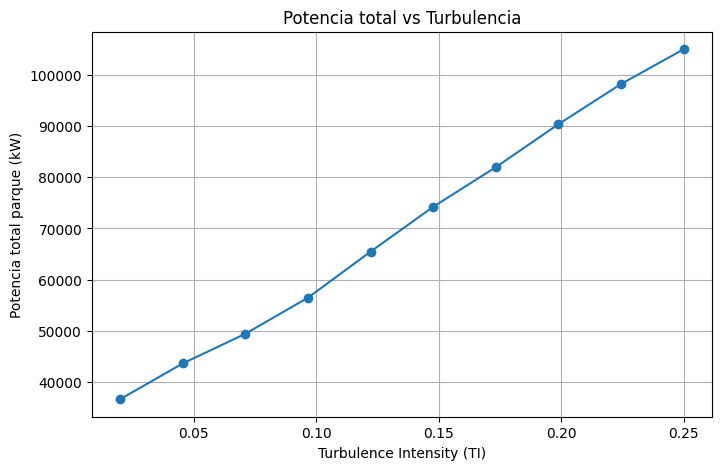

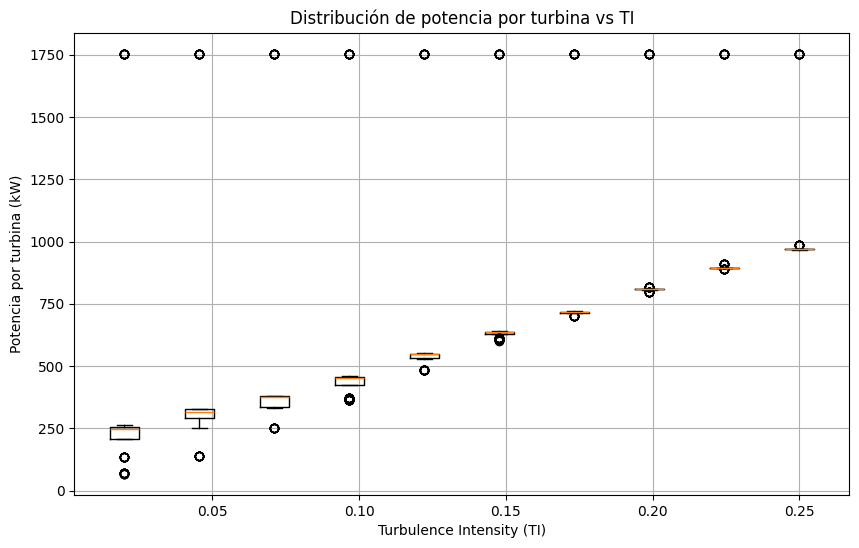

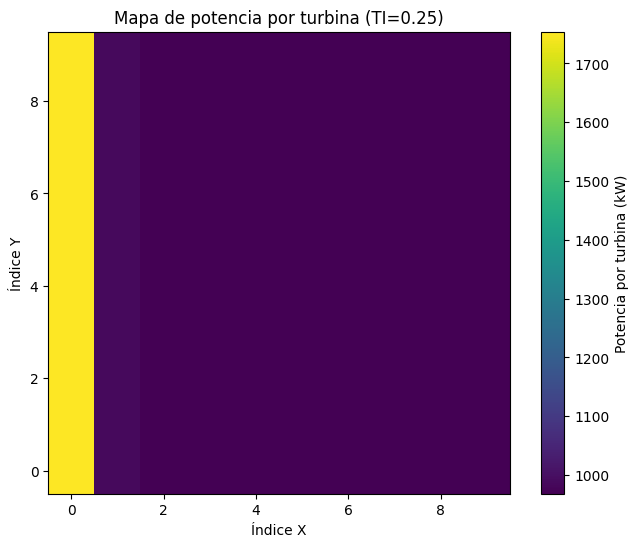

Potencia total TI=0.02: 36,695.1 kW
Potencia total TI=0.25: 104,951.8 kW
Cambio relativo: 186.01%
Potencia media por columna (x): [1753.95445918  987.07274024  970.09329166  970.70987097  969.72436304
  968.9676761   968.6123446   968.53641088  968.64280034  968.86520188]
Potencia media por fila (y): [1049.25511525 1049.41970777 1049.54659297 1049.60105634 1049.62554557
 1049.63204345 1049.62193412 1049.58707522 1049.49413484 1049.39595335]


In [18]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parámetros del parque grande ---
nx, ny = 10, 10          # número de turbinas en x e y => nx*ny turbinas
spacing_x = 400          # separación en x (m)
spacing_y = 400          # separación en y (m)

# construir layout en malla regular
x_coords = []
y_coords = []
for i in range(nx):
    for j in range(ny):
        x_coords.append(i * spacing_x)
        y_coords.append(j * spacing_y)

# asignar al modelo
fmodel.set(layout_x=x_coords, layout_y=y_coords)

# Condiciones de viento fijas
wind_direction = [270.0]   # dirección fija
wind_speed = [8.0]         # velocidad fija (m/s)

# Barrido de turbulencias
TI_values = np.linspace(0.02, 0.25, 10)   # por ejemplo 10 valores entre 2% y 25%
n_TI = len(TI_values)
N_TURBINES = fmodel.core.farm.n_turbines  # número real de turbinas en fmodel

# almacenar resultados
powers_all = np.zeros((n_TI, N_TURBINES))  # kW por turbina

for i, TI in enumerate(TI_values):
    # configurar solo la turbulencia (dejamos wd/ws fijos)
    fmodel.set(
        wind_directions=wind_direction,
        wind_speeds=wind_speed,
        turbulence_intensities=[TI]
    )
    fmodel.run()
    powers = fmodel.get_turbine_powers() / 1000.0  # convertir a kW
    # powers puede tener forma (n_wd_ws, n_turbines); asumimos 1 cond. -> tomar [0]
    if powers.ndim == 2:
        powers_vec = powers[0, :]
    else:
        powers_vec = powers.flatten()
    powers_all[i, :] = powers_vec

# --- Gráficos ---

# 1) Potencia total del parque vs TI
total_power = powers_all.sum(axis=1)

plt.figure(figsize=(8,5))
plt.plot(TI_values, total_power, marker='o')
plt.xlabel("Turbulence Intensity (TI)")
plt.ylabel("Potencia total parque (kW)")
plt.title("Potencia total vs Turbulencia")
plt.grid(True)
plt.show()

# 2) Boxplot: distribución de potencias por turbina para cada TI
plt.figure(figsize=(10,6))
plt.boxplot(powers_all.T, positions=TI_values, widths=0.01, manage_ticks=False)
plt.xlabel("Turbulence Intensity (TI)")
plt.ylabel("Potencia por turbina (kW)")
plt.title("Distribución de potencia por turbina vs TI")
plt.grid(True)
plt.show()

# 3) Heatmap de potencia por turbina para un TI seleccionado (ej: última fila TI_values[-1])
ti_index = -1
powers_for_heat = powers_all[ti_index, :]

# convertir vector a matriz nx x ny para visualización (si el layout fue ordenado por filas)
heat = powers_for_heat.reshape((nx, ny)).T  # trasponer para que eje y quede vertical

plt.figure(figsize=(8,6))
plt.imshow(heat, origin='lower', aspect='equal')
plt.colorbar(label='Potencia por turbina (kW)')
plt.title(f"Mapa de potencia por turbina (TI={TI_values[ti_index]:.2f})")
plt.xlabel("Índice X")
plt.ylabel("Índice Y")
plt.show()

# 4) Métricas adicionales: mejora relativa de la potencia total entre TI mínimo y máximo
pct_change = 100.0 * (total_power[-1] - total_power[0]) / total_power[0]
print(f"Potencia total TI={TI_values[0]:.2f}: {total_power[0]:,.1f} kW")
print(f"Potencia total TI={TI_values[-1]:.2f}: {total_power[-1]:,.1f} kW")
print(f"Cambio relativo: {pct_change:.2f}%")

# 5) (Opcional) Promedio por columna/filas: entender dónde se gana más
mean_by_column = heat.mean(axis=0)  # promedio en y para cada x
mean_by_row = heat.mean(axis=1)     # promedio en x para cada y
print("Potencia media por columna (x):", mean_by_column)
print("Potencia media por fila (y):", mean_by_row)
